In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
sns.set(style="whitegrid")


# IMPORTING DATAS

mental_file = r"C:\Users\samim\OneDrive\Masaüstü\Mental health Depression disorder Data.xlsx"

mental_data = pd.read_excel(mental_file)


digital_data = r"C:\Users\samim\OneDrive\Masaüstü\daily-hours-spent-with-digital-media-per-adult-user.csv"

digital_usage_data =pd.read_csv(digital_data)


In [2]:
# FILTERING USA FOR COMPARING

usa_mental =mental_data[mental_data["Entity"] == "United States"].copy()
usa_digital=digital_usage_data[digital_usage_data["Entity"] == "United States"].copy()

In [3]:
# FILTERING YEARS  (2008-2018)

usa_mental =usa_mental[(usa_mental["Year"] >= 2008) & (usa_mental["Year"] <= 2018)]
usa_digital =usa_digital[(usa_digital["Year"] >= 2008) & (usa_digital["Year"] <= 2018)]

usa_digital

,Entity,Code,Year,Mobile (BOND Internet Trends (2019)),Desktop/Laptop (BOND Internet Trends (2019)),Other Connected Devices (BOND Internet Trends (2019))
0,United States,USA,2008,0.3,2.2,0.2
1,United States,USA,2009,0.3,2.3,0.3
2,United States,USA,2010,0.4,2.4,0.4
3,United States,USA,2011,0.8,2.6,0.3
4,United States,USA,2012,1.6,2.5,0.3
5,United States,USA,2013,2.3,2.3,0.3
6,United States,USA,2014,2.6,2.2,0.3
7,United States,USA,2015,2.8,2.2,0.4
8,United States,USA,2016,3.1,2.2,0.4
9,United States,USA,2017,3.3,2.1,0.6


In [4]:
# SELECTING SPECIFIED MENTAL ORDERS

mental_coloumns =["Year","Schizophrenia (%)","Bipolar disorder (%)","Anxiety disorders (%)","Depression (%)"]

usa_mental =usa_mental[mental_coloumns]

usa_mental


,Year,Schizophrenia (%),Bipolar disorder (%),Anxiety disorders (%),Depression (%)
6094,2008,0.338901,0.653691,6.801899,4.776402
6095,2009,0.337887,0.653468,6.737790,4.765950
6096,2010,0.33739,0.653247,6.704455,4.761551
6097,2011,0.33719,0.653008,6.693384,4.762322
6098,2012,0.336852,0.652748,6.682107,4.765481
6099,2013,0.336404,0.652479,6.671047,4.772422
6100,2014,0.33586,0.652195,6.660473,4.782222
6101,2015,0.335243,0.65189,6.650662,4.795954
6102,2016,0.334578,0.651569,6.642099,4.813114
6103,2017,0.33389,0.651236,6.635055,4.835610


In [5]:
# CALCULATING TOTAL DIGITAL MEDIA USAGE 

usa_digital["total_digital_hours"] = (usa_digital["Mobile (BOND Internet Trends (2019))"] + usa_digital["Desktop/Laptop (BOND Internet Trends (2019))"]+
                                      usa_digital["Other Connected Devices (BOND Internet Trends (2019))"])




In [6]:
# MERGING DATAS FOR SELECTED YEARS (2008-2018)

df =pd.merge(usa_digital[["Year","total_digital_hours"]],usa_mental, on="Year", how="inner")

df

,Year,total_digital_hours,Schizophrenia (%),Bipolar disorder (%),Anxiety disorders (%),Depression (%)
0,2008,2.7,0.338901,0.653691,6.801899,4.776402
1,2008,2.7,3.505492,5.998963,NaN,NaN
2,2008,2.7,11.764397,4336.330277,NaN,NaN
3,2008,2.7,14253409.0739,NaN,NaN,NaN
4,2009,2.9,0.337887,0.653468,6.737790,4.765950
5,2009,2.9,3.501412,5.982055,NaN,NaN
6,2009,2.9,11.839134,4327.481576,NaN,NaN
7,2009,2.9,14348119.6664,NaN,NaN,NaN
8,2010,3.2,0.33739,0.653247,6.704455,4.761551
9,2010,3.2,3.49846,5.976154,NaN,NaN


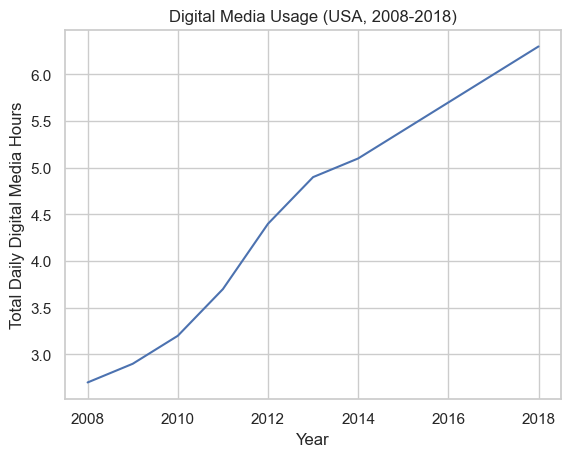

In [7]:
#VISUALIZATION FOR DIGITAL MEDIA HOURS 2008 TO 2018 (PLOTTING)

plt.plot(df["Year"],df["total_digital_hours"])
plt.xlabel("Year")
plt.ylabel("Total Daily Digital Media Hours")
plt.title("Digital Media Usage (USA, 2008-2018)")
plt.grid(True)
plt.show()

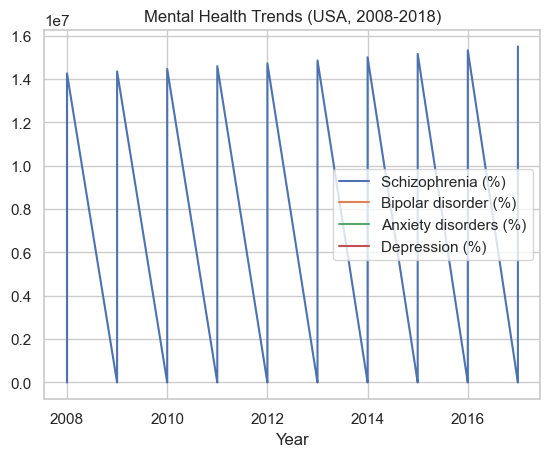

In [8]:
#VISUALIZATION FOR MENTAL HEALTH OVER TIME (PLOTTING)

for col in ["Schizophrenia (%)","Bipolar disorder (%)","Anxiety disorders (%)","Depression (%)"]:
 plt.plot(df["Year"],df[col],label=col)

plt.xlabel("Year")
plt.title("Mental Health Trends (USA, 2008-2018)")
plt.legend()
plt.grid(True)
plt.show()

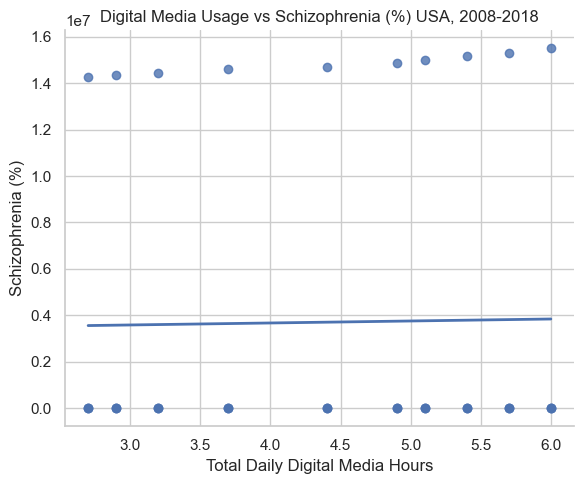

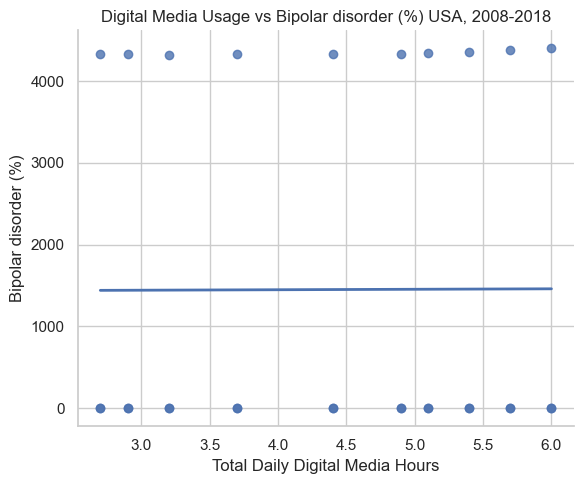

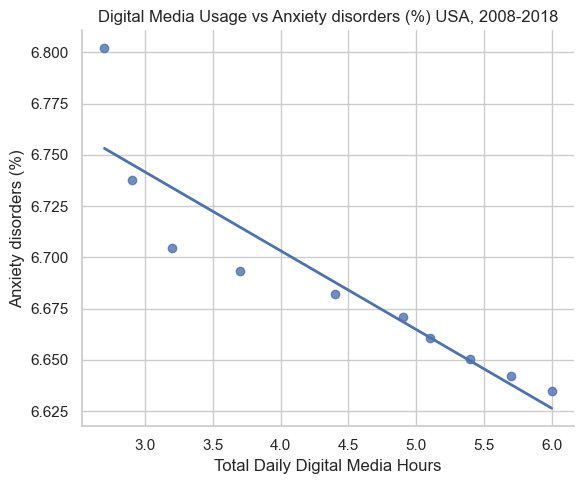

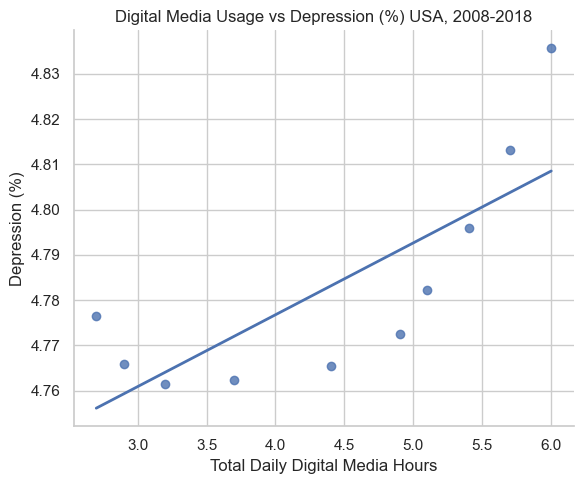

In [9]:
# SEABORN REGRESSION PLOTS

fixed_mental_cols =["Schizophrenia (%)","Bipolar disorder (%)","Anxiety disorders (%)","Depression (%)"]

for col in fixed_mental_cols:
 sns.lmplot( x="total_digital_hours", y=col, data=df, height=5, aspect=1.2, ci=None, line_kws={"linewidth":2})
 plt.title(f"Digital Media Usage vs {col} USA, 2008-2018")
 plt.xlabel("Total Daily Digital Media Hours")
 plt.ylabel(col)
 plt.tight_layout()
 plt.show()


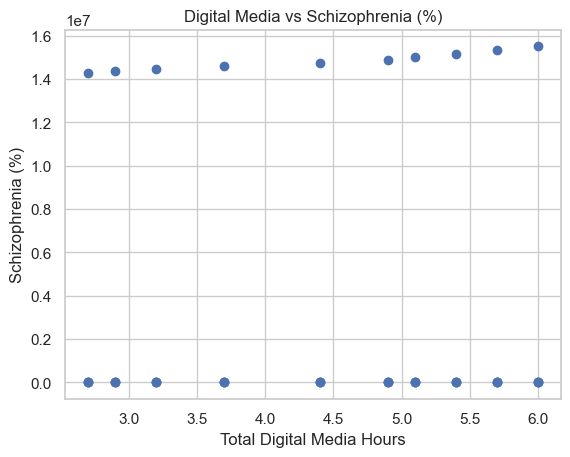

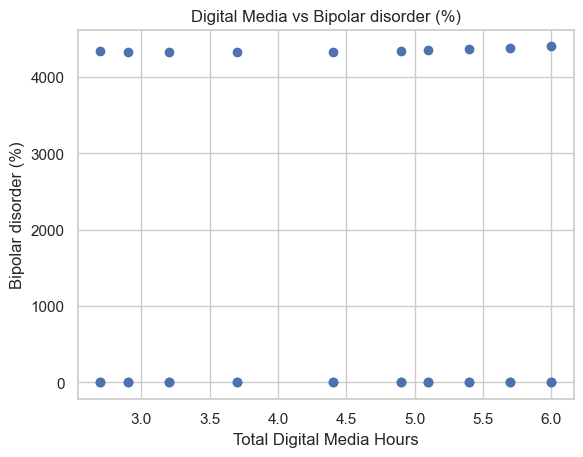

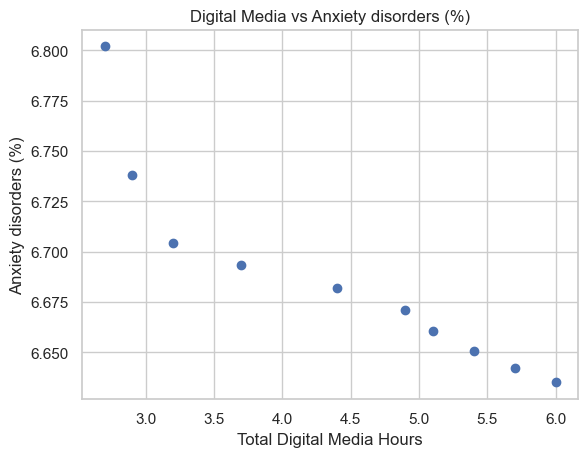

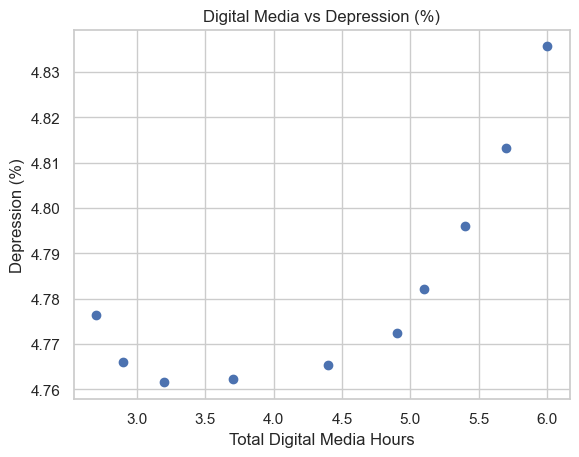

In [10]:
# SCATTER PLOTS FOR VISUALLY SHOWING THE CORRELATION BETWEEN MENTAL HEALTH AND DIGITAL MEDIA USAGE

for col in ["Schizophrenia (%)","Bipolar disorder (%)","Anxiety disorders (%)","Depression (%)"]:
 plt.scatter(df["total_digital_hours"], df[col])
 plt.xlabel("Total Digital Media Hours")
 plt.ylabel(col)
 plt.title(f"Digital Media vs {col}")
 plt.grid(True)
 plt.show()

In [11]:
# REMOVING OBJECT FORMATS Year- Schizophrenia (%)-  Bipolar disorder (%) TURNING THEM INTO NUMERIC

df["Year"] =pd.to_numeric(df["Year"],errors="coerce")
corr_coloumns =["Schizophrenia (%)","Bipolar disorder (%)"]

for col in corr_coloumns:
 df[col] =df[col].astype(str).str.strip()     
 df[col] =pd.to_numeric(df[col],errors="coerce")

df =df.dropna(subset=["Year","total_digital_hours"]+corr_coloumns)

df

,Year,total_digital_hours,Schizophrenia (%),Bipolar disorder (%),Anxiety disorders (%),Depression (%)
0,2008,2.7,0.338901,0.653691,6.801899,4.776402
1,2008,2.7,3.505492,5.998963,NaN,NaN
2,2008,2.7,11.764397,4336.330277,NaN,NaN
4,2009,2.9,0.337887,0.653468,6.737790,4.765950
5,2009,2.9,3.501412,5.982055,NaN,NaN
6,2009,2.9,11.839134,4327.481576,NaN,NaN
8,2010,3.2,0.337390,0.653247,6.704455,4.761551
9,2010,3.2,3.498460,5.976154,NaN,NaN
10,2010,3.2,11.747920,4324.207090,NaN,NaN
12,2011,3.7,0.337190,0.653008,6.693384,4.762322


In [12]:
# HYPOTHESIS TESTING FOR EACH MENTAL DISORDER and CALCULATING PEARSON COEFFICIENT

alpha = 0.05 

for col in fixed_mental_cols:
    r,p = pearsonr(df["total_digital_hours"],df[col])
    
    print(f"Hypothesis Test for: {col}")
    print("---------------------------")

    print("H0: There is no correlation between digital media usage and", col)
    print("H1: There is a correlation.\n")
    print("---------------------------")

    print(f"Pearson correlation(r): {r:.4f}")
    print(f"P-value:{p:.4f}")
    
    print("---------------------------")

    if p< alpha:
        print(f"\n Result: p <{alpha}, so we should reject H0.")
        print(f" Digital media usage is statistically correlated with {col} in the USA in that interval.")
    else:
        print(f"\n Result: p ≥{alpha}, so we fail to reject H0.")
        print(f" Digital media usage is clearly not statistically correlated with {col} in the USA in that interval.")
    
    print("---------------------------")

Hypothesis Test for: Schizophrenia (%)
---------------------------
H0: There is no correlation between digital media usage and Schizophrenia (%)
H1: There is a correlation.

---------------------------
Pearson correlation(r): 0.0242
P-value:0.8990
---------------------------

 Result: p ≥0.05, so we fail to reject H0.
 Digital media usage is clearly not statistically correlated with Schizophrenia (%) in the USA in that interval.
---------------------------
Hypothesis Test for: Bipolar disorder (%)
---------------------------
H0: There is no correlation between digital media usage and Bipolar disorder (%)
H1: There is a correlation.

---------------------------
Pearson correlation(r): 0.0032
P-value:0.9867
---------------------------

 Result: p ≥0.05, so we fail to reject H0.
 Digital media usage is clearly not statistically correlated with Bipolar disorder (%) in the USA in that interval.
---------------------------
Hypothesis Test for: Anxiety disorders (%)
--------------------------

In [13]:
# SAVING DATA 

df.to_csv("saved_clean_data.csv",index=False)